In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## PRE-PROCESSING

Dataset is downloaded in my local machine

In [3]:

op=pd.read_csv('Fraud.csv')


In [4]:
#Getting the top few rows of the dataframe
op.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### ANALYSIS

In [5]:
op.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
# Getting information about data
op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
op.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### No NULL values

In [8]:
## Creating separate data frames for legit and fraud transactions
legit_op = op[op.isFraud == 0]
fraud_op = op[op.isFraud == 1]

print(" Legit transactions: ", len(legit_op))
print(" Fraud transactions: ", len(fraud_op))

 Legit transactions:  6354407
 Fraud transactions:  8213


Checking for balanced or unbalanced data 

In [9]:
legit_opp=len(legit_op)
fraud_opp=len(fraud_op)
legit_percent = (legit_opp / (fraud_opp + legit_opp)) * 100
fraud_percent = (fraud_opp / (fraud_opp + legit_opp)) * 100

print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


Highly Unbalanced datasets , so linear and logistic regression models will give very inaccurate results and Decision tree and random forest can be used

##### Separating the payment transaction by filtering all the values in nameDest containing first character "M"

In [10]:

payment = op[op['nameDest'].str.contains('M')]
payment.shape
payment.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


Converting all the object datatypes into numeric using label encoder 

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mk=op.copy()
kl = mk.select_dtypes(include = "object").columns
for ob in kl:
    mk[ob] = le.fit_transform(mk[ob].astype(str))


In [12]:
mk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


### How to decide which variable should be included in the model?
We will use the VIF values and correlation heatmap. Dropping one of the two attributes which are highly correlated to each other and the one which is less correlated to the isFraud.


In [13]:
mk.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


## mk is the new dataset containing no object datatype

## Visualisation of datasets

#### CORRELATION HEATMAP

C:\Users\Ankit\AppData\Local\Temp\ipykernel_15132\1843686721.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=op.corr()


<AxesSubplot: >

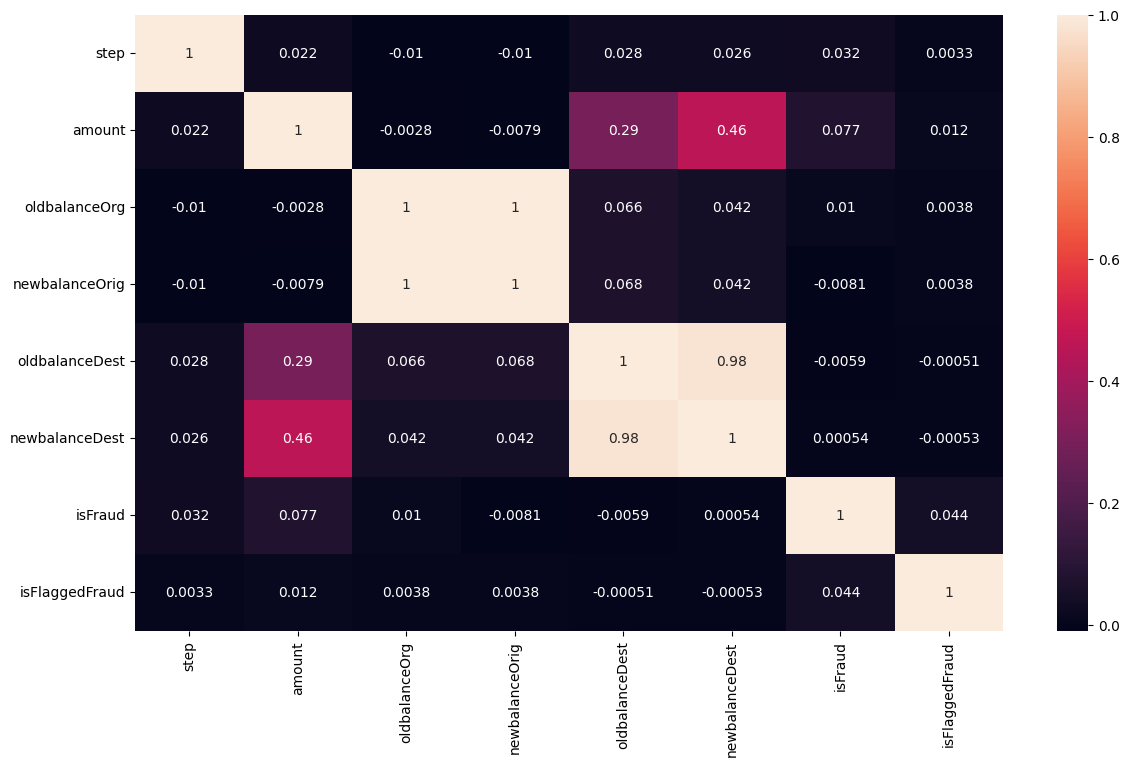

In [14]:
corr=op.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

## PROBLEM SOLVING

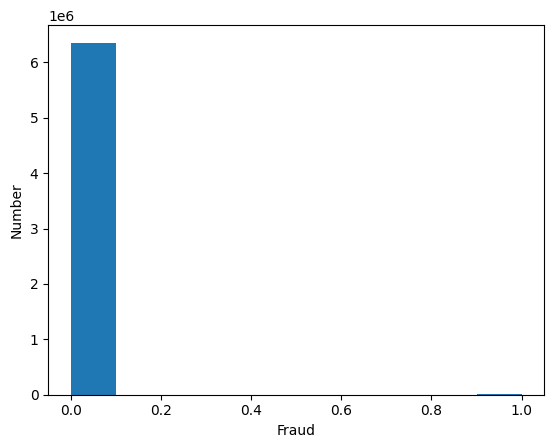

In [15]:
plt.hist(op['isFraud'])
plt.ylabel('Number')
plt.xlabel('Fraud')
plt.show()

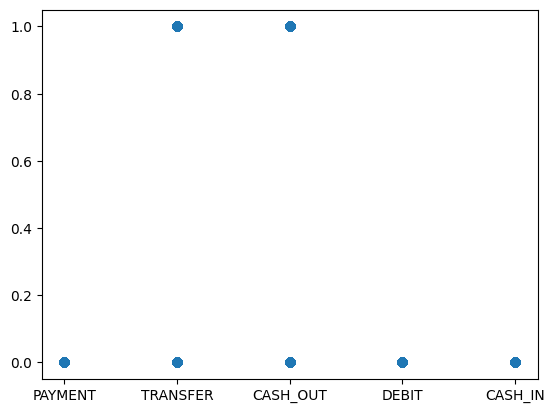

In [16]:
plt.scatter(op['type'],op['isFraud'])
plt.show()

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results. Thus, the variance inflation factor can estimate how much the variance of a regression coefficient is inflated due to multicollinearity.

##  Calculating variance inflation factor

In [17]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
def vi(mk):
    vif = pd.DataFrame()
    vif["variables"] = mk.columns
    vif["VIF"] = [variance_inflation_factor(mk.values, i) for i in range(mk.shape[1])]
    return(vif)
df=vi(mk)

In [18]:
## df contains vif for all the variables in the dataframes
print(df)

         variables         VIF
0             step    2.791610
1             type    4.467405
2           amount    4.149312
3         nameOrig    2.764234
4    oldbalanceOrg  576.803777
5   newbalanceOrig  582.709128
6         nameDest    3.300975
7   oldbalanceDest   73.349937
8   newbalanceDest   85.005614
9          isFraud    1.195305
10  isFlaggedFraud    1.002587


OldbalanceOrg and newbalanceOrig ,oldbalanceDest and newbalanceDest have very high VIF thus they are highly correlated.


Dropping oldbalanceOrg and newbalanceOrig and again checking the vif

In [19]:
mk['actorig'] = mk.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
mk = mk.drop(['oldbalanceOrg','newbalanceOrig'],axis=1)

vi(mk)

,variables,VIF
0,step,2.752151
1,type,4.311557
2,amount,4.097262
3,nameOrig,2.708756
4,nameDest,3.284736
5,oldbalanceDest,72.464107
6,newbalanceDest,84.090236
7,isFraud,1.190088
8,isFlaggedFraud,1.002585
9,actorig,1.344565


In [20]:

mk['actdist'] = mk.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
mk['trans'] = mk.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)
mk = mk.drop(['oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)
vi(mk)


,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,actorig,1.307910
5,actdist,3.754335
6,trans,2.677167


### Checking the heatmap again after removing correlation

<AxesSubplot: >

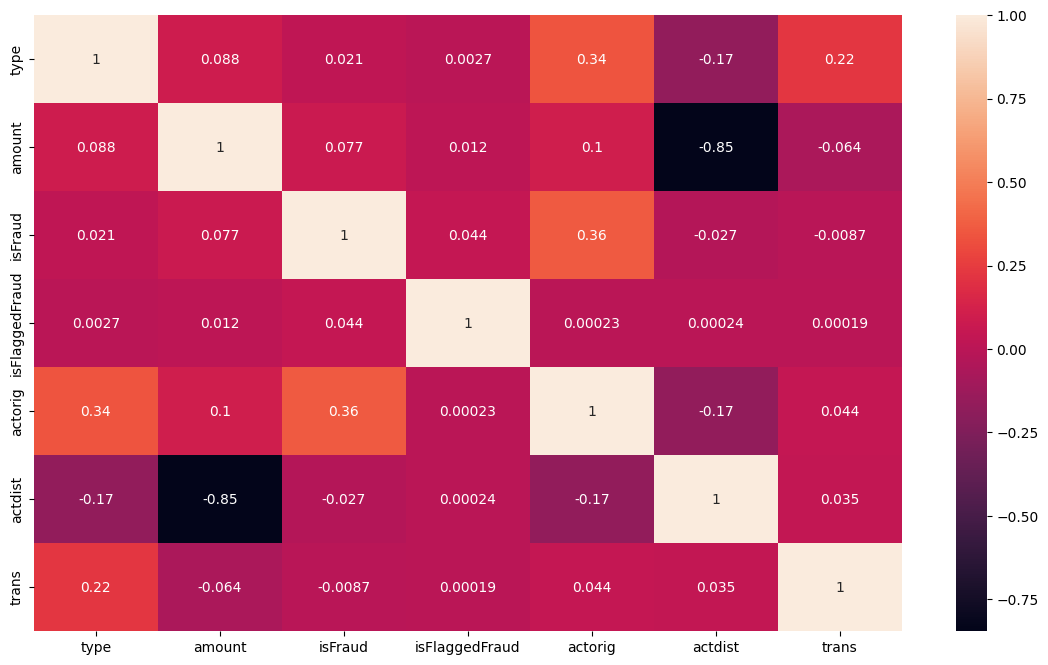

In [21]:
corr=mk.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

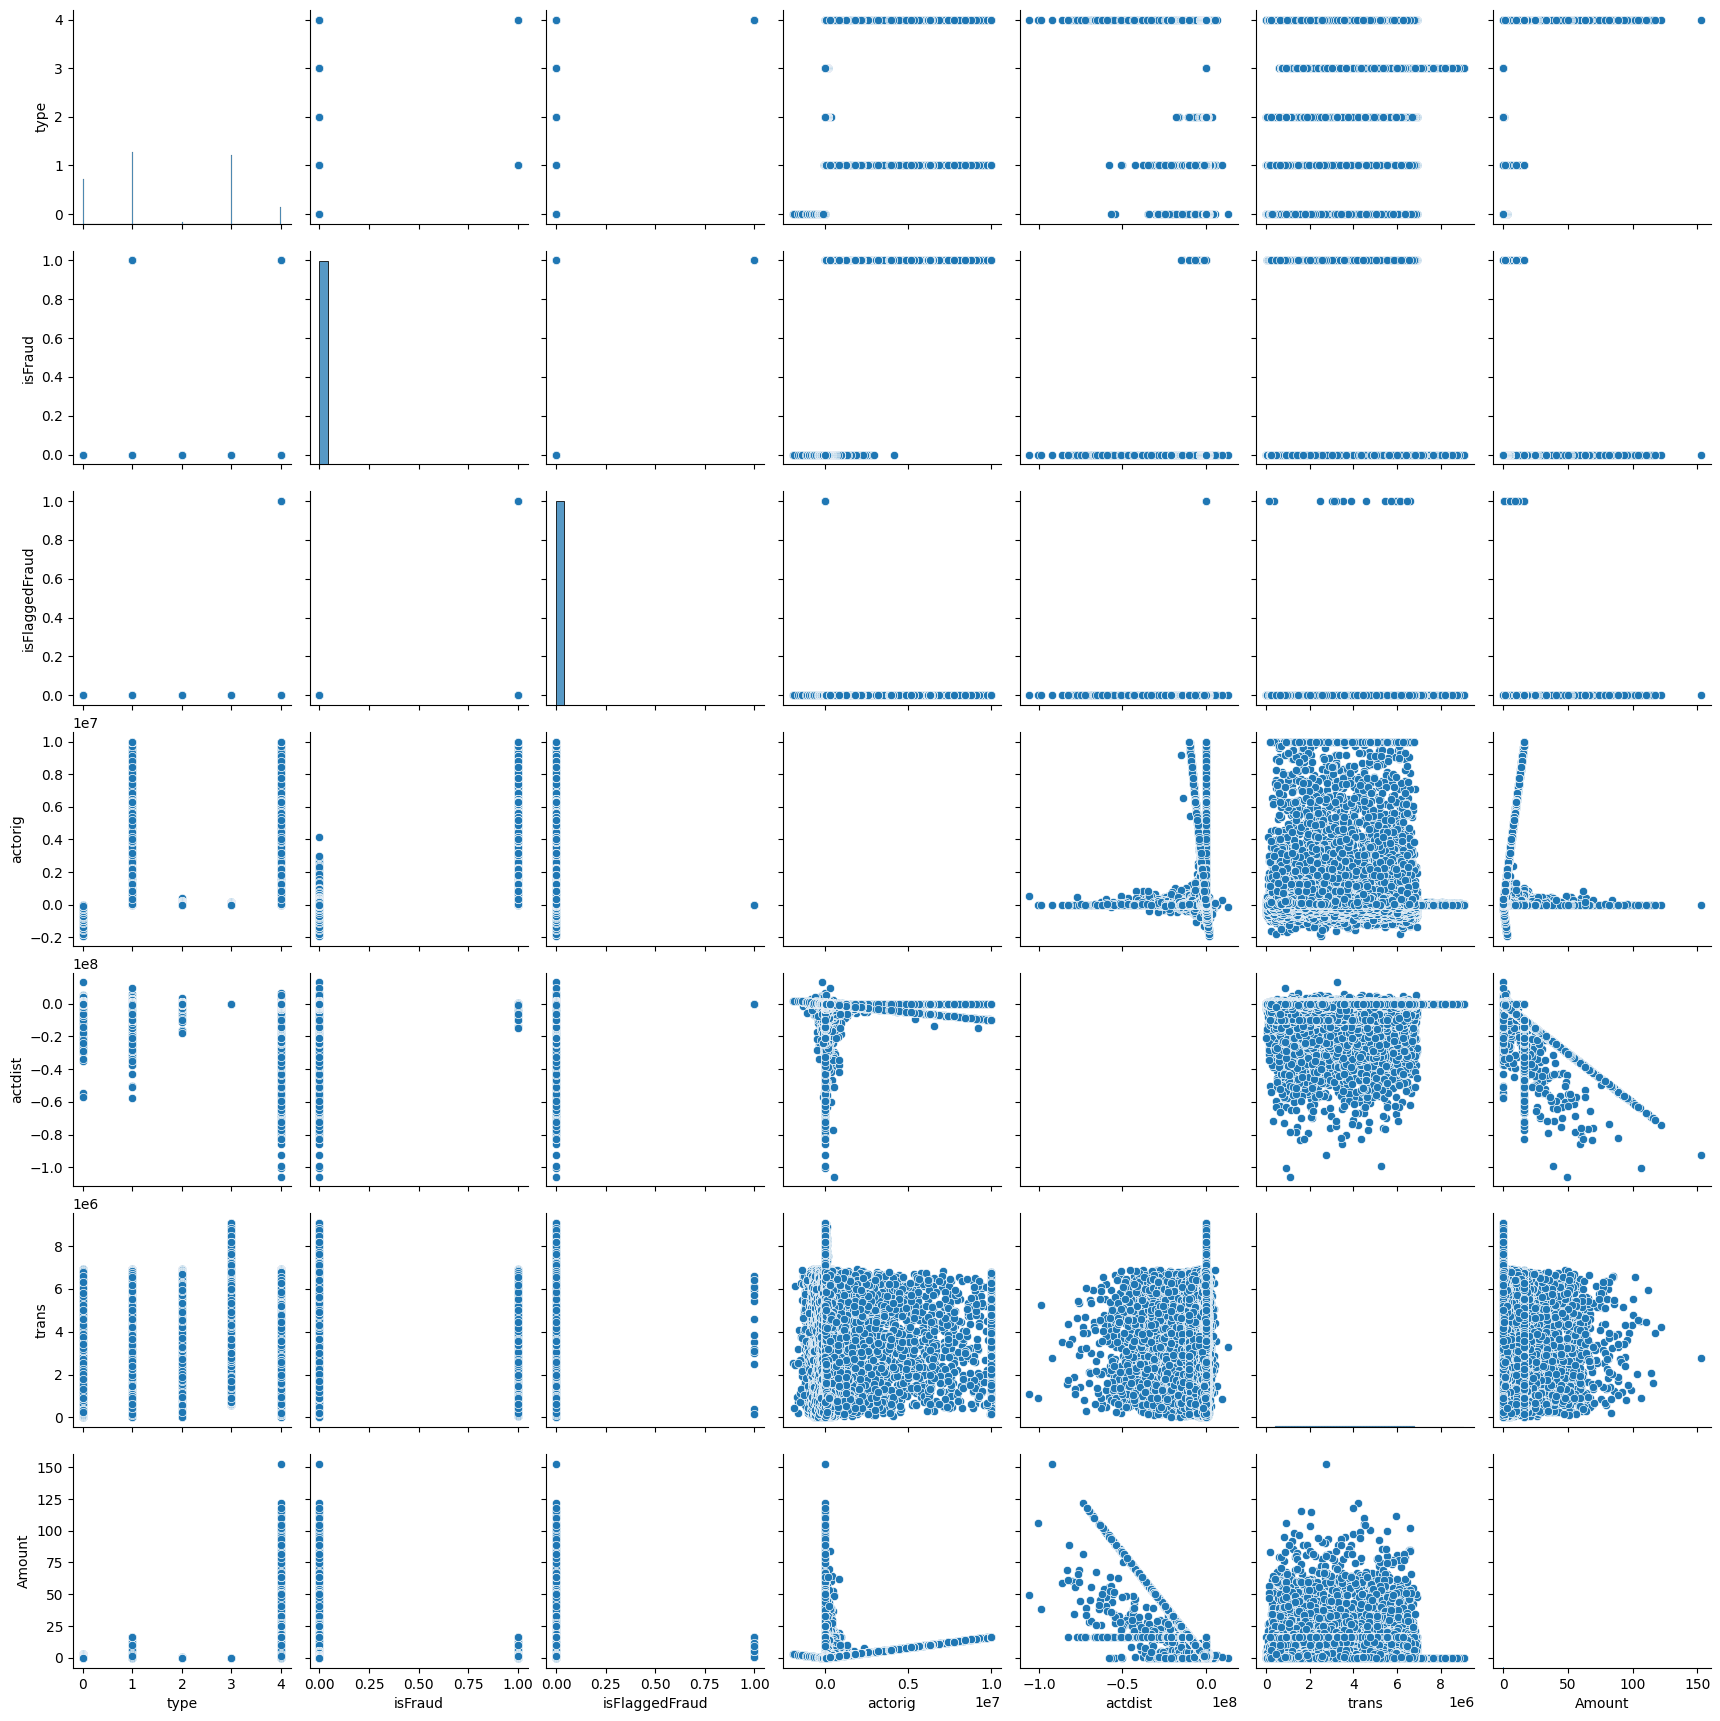

In [50]:
sns.pairplot(mk)

## Correlation part is done , now we should start building model

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [23]:
scaler = StandardScaler()
mk["Amount"] = scaler.fit_transform(mk["amount"].values.reshape(-1, 1))
mk.drop(["amount"], inplace= True, axis= 1)
## Separating the x part and y part from the dataset for building the model
Y= mk["isFraud"]
X= mk.drop(["isFraud"], axis= 1)

X

,type,isFlaggedFraud,actorig,actdist,trans,Amount
0,3,0,9839.64,0.00,2419963.0,-0.281560
1,3,0,1864.28,0.00,3922922.0,-0.294767
2,4,0,181.00,0.00,1441841.0,-0.297555
3,1,0,181.00,21182.00,6219958.0,-0.297555
4,3,0,11668.14,0.00,4274900.0,-0.278532
...,...,...,...,...,...,...
6362615,1,0,339682.13,-339682.13,6157710.0,0.264665
6362616,4,0,6311409.28,0.00,1998227.0,10.153953
6362617,1,0,6311409.28,-6311409.27,642182.0,10.153953
6362618,4,0,850002.52,0.00,2572645.0,1.109765


#### TRAIN-TEST SPLIT

In [24]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.2, random_state= 42)
X_train

,type,isFlaggedFraud,actorig,actdist,trans,Amount
6271196,0,0,-386385.07,386385.08,4738366.0,0.342006
1888243,0,0,-212458.78,212458.78,6018155.0,0.053981
5549957,3,0,3634.00,0.00,7216993.0,-0.264788
2025342,1,0,180216.00,-527616.51,5542864.0,0.575888
682342,4,0,0.00,-206067.84,5896153.0,0.043398
...,...,...,...,...,...,...
1570006,0,0,-129715.85,129715.85,2563403.0,-0.083043
2234489,3,0,0.00,0.00,4300231.0,-0.293781
4926484,1,0,10579.16,-10579.16,1938844.0,-0.280335
4304572,1,0,20289.00,-73020.77,4596477.0,-0.176931


## Decision tree

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
treee = DecisionTreeClassifier()
model=treee.fit(X_train,Y_train)

In [26]:
Y_pred= treee.predict(X_test)
score= treee.score(X_test, Y_test) 

In [27]:
from sklearn.metrics import accuracy_score
sc=accuracy_score(Y_pred,Y_test)
score*100

99.92377353983107

In [28]:

from sklearn import tree

In [29]:
text_representation = tree.export_text(treee)
print(text_representation)


|--- feature_2 <= 871671.72
|   |--- feature_2 <= 554499.97
|   |   |--- feature_2 <= 325240.55
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- feature_2 <= 112656.12
|   |   |   |   |   |--- feature_2 <= 36267.41
|   |   |   |   |   |   |--- feature_5 <= -0.30
|   |   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_5 <= -0.30
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_5 >  -0.30
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_5 >  -0.30
|   |   |   |   |   |   |   |--- feature_0 <= 3.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 16614.80
|   |   |   |   |   |   |   |   |   

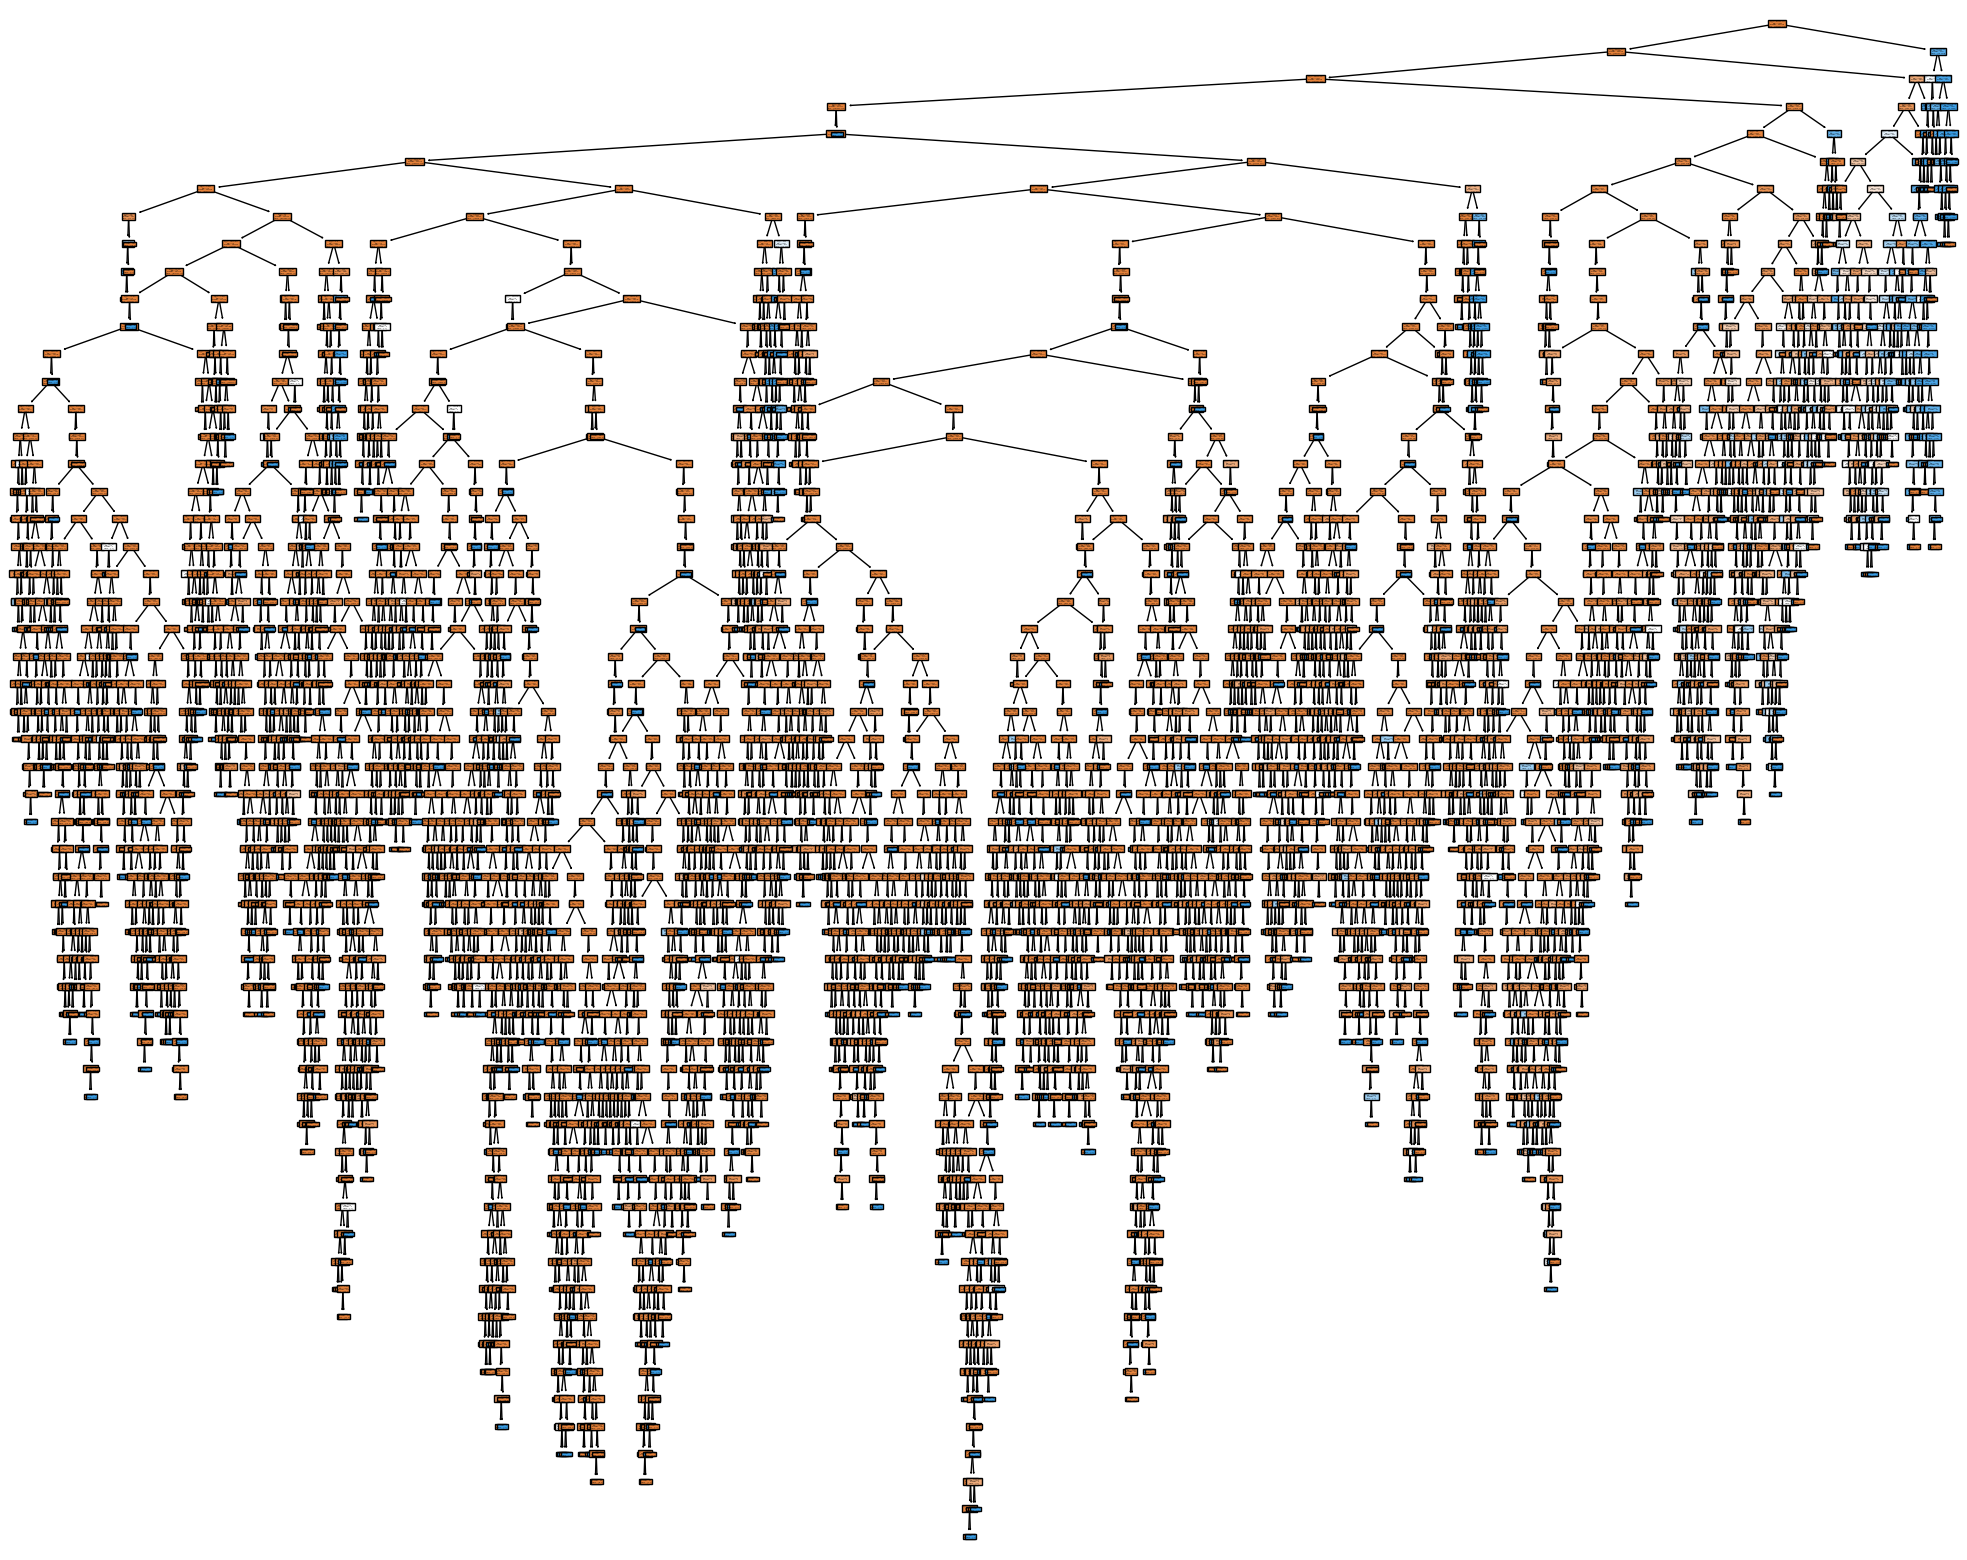

In [30]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(treee, 
                   filled=True)


In [33]:
print("Decision Tree Score: ", sc)


Decision Tree Score:  0.9992377353983107


In [1]:

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



In [37]:
confu = confusion_matrix(Y_test, Y_pred.round())
print(confu)


[[1270399     505]
 [    465    1155]]


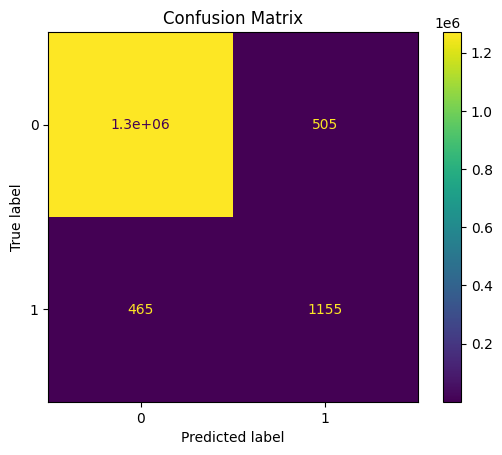

In [47]:

cnf= ConfusionMatrixDisplay(confusion_matrix=confu)
cnf.plot()
plt.title('Confusion Matrix')
plt.show()

In [38]:
we=RandomForestClassifier()

In [39]:
we.fit(X_train,Y_train)

RandomForestClassifier()

In [42]:

classi= classification_report(Y_test, Y_pred)
print(classi)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.70      0.71      0.70      1620

    accuracy                           1.00   1272524
   macro avg       0.85      0.86      0.85   1272524
weighted avg       1.00      1.00      1.00   1272524



In [43]:
y_predran=we.predict(X_test)

In [44]:
accrf=accuracy_score(y_predran,Y_test);
accrf

0.9995952925052887

In [46]:
## Classification report of random forest

classif= classification_report(Y_test, y_predran)
print(classif)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.71      0.82      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.85      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



In [48]:
confuran = confusion_matrix(Y_test, y_predran.round())
print(confuran)

[[1270861      43]
 [    472    1148]]


### Random forest have better precision and f1-score and both have almost same accuracy

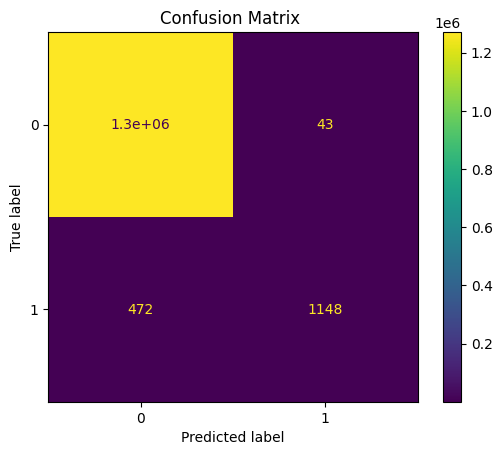

In [49]:

condran = ConfusionMatrixDisplay(confusion_matrix=confuran)
condran.plot()
plt.title('Confusion Matrix ')
plt.show()

<br>We can see that the accuracy of Random Forest and Decision Tree is identical, but the precision of Random Forest is greater. Precision is critical in a fraud detection model because, rather than properly predicting regular transactions, we want Fraud transactions to be predicted correctly while Legit transactions are ignored.If any of the two reasons is not met, we may catch the innocent while leaving the perpetrator.
